# Table of Contents
 <p><div class="lev1 toc-item"><a href="#新词分析" data-toc-modified-id="新词分析-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>新词分析</a></div><div class="lev2 toc-item"><a href="#识别正确的新词的词性组合" data-toc-modified-id="识别正确的新词的词性组合-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>识别正确的新词的词性组合</a></div><div class="lev1 toc-item"><a href="#NER分析" data-toc-modified-id="NER分析-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>NER分析</a></div><div class="lev1 toc-item"><a href="#新词统计量" data-toc-modified-id="新词统计量-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>新词统计量</a></div><div class="lev2 toc-item"><a href="#新词词长" data-toc-modified-id="新词词长-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>新词词长</a></div><div class="lev2 toc-item"><a href="#新词词性" data-toc-modified-id="新词词性-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>新词词性</a></div><div class="lev2 toc-item"><a href="#新词词频" data-toc-modified-id="新词词频-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>新词词频</a></div><div class="lev2 toc-item"><a href="#新词左右信息熵" data-toc-modified-id="新词左右信息熵-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>新词左右信息熵</a></div><div class="lev2 toc-item"><a href="#新词点互信息" data-toc-modified-id="新词点互信息-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>新词点互信息</a></div><div class="lev2 toc-item"><a href="#登陆词和未登录词" data-toc-modified-id="登陆词和未登录词-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>登陆词和未登录词</a></div>

# 新词分析 #

In [8]:
%matplotlib inline
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.5})
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(20,7)

unknowFile = "unknown.info"

dataPath = "../"
newWordFile = "../../test/ans/total.txt.src.nw"
#recallFile = dataPath + "WordCRF.nw..r"
#preFile = dataPath + "WordCRF.nw..p"

dis = pd.read_csv(newWordFile, sep="\\s+", names=["word", "type", "length", "pos", "tf", "pmi", "le", "re"])
#recall = pd.read_csv(recallFile, sep="\\s+", names=["word", "type", "length", "pos", "tf", "pmi", "le", "re", "answer"])
#pre = pd.read_csv(preFile, sep="\\s+", names=["word", "seg", "length", "pos", "tf", "pmi", "le", "re", "tfPre", "nothing", "label","answer"])

def label(ax):
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.0f}'.format(y), (x.mean(), y), ha='center', va='bottom')
    return ax


In [ ]:
tag="pmi"
tmp=dis#[info["length"] < 10]
yes = tmp[tmp["new"].str.contains("yes")][tag].value_counts().sort_index()
no = tmp[tmp["new"].str.contains("no")][tag].value_counts().sort_index()
totals = [i+j for i,j in zip(yes, no)]
# Create the percentage of the total score the pre_score value for each participant was
yes_rel = [i / j * 100 for  i,j in zip(yes, totals)]
# Create the percentage of the total score the mid_score value for each participant was
no_rel = [i / j * 100 for  i,j in zip(no, totals)]

f, axs = plt.subplots(figsize=(10,5), ncols=2)
ax=axs[1]
print(yes.index)
N = len(yes)
ind = np.arange(N)    # the x locations for the groups
width = 0.7       # the width of the bars: can also be len(x) sequence
p1 = ax.bar(ind, no_rel, width, color='#d62728')
p2 = ax.bar(ind, yes_rel, width,bottom=no_rel)
#ax.ylabel('Percentage')
ax.set_title('Ratio in ' + tag)
plt.xticks(ind, yes.index)
#ax.set_xticks(ind, yes.index)
#ax.set_yticklabels(np.arange(0, 100, 10))
ax.legend((p1[0], p2[0]), ('Known', 'New'))
#plt.show()

In [ ]:
linfo = pd.read_csv("../word.local.info", sep="\\s+", names=["word", "length", "tf", "pmi", "le", "re", "new"])
ginfo = pd.read_csv("../word.renmin.info", sep="\\s+", names=["word", "length", "tf", "pmi", "le", "re", "new"])
info = linfo
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(30, 5)
label(sns.countplot(x="length", hue="new", data=info[info["length"] <= 5], ax=axs[0]))
label(sns.countplot(x="length", hue="new", data=info[info["length"] > 5], ax=axs[1], hue_order=["no", "yes"]))
fig, axs = plt.subplots(ncols=4)
fig.set_size_inches(30, 5)
label(sns.countplot(x="tf",hue="new", data=info, ax=axs[0]))
label(sns.countplot(x="pmi",hue="new", data=info, ax=axs[1]))
label(sns.countplot(x="le",hue="new", data=info, ax=axs[2]))
label(sns.countplot(x="re",hue="new", data=info, ax=axs[3]))

info = ginfo
fig, axs = plt.subplots(ncols=4)
fig.set_size_inches(30, 5)
label(sns.countplot(x="tf",hue="new", data=info, ax=axs[0]))
label(sns.countplot(x="pmi",hue="new", data=info, ax=axs[1]))
label(sns.countplot(x="le",hue="new", data=info, ax=axs[2]))
label(sns.countplot(x="re",hue="new", data=info, ax=axs[3]))

In [ ]:
info = pd.merge(linfo, ginfo, on='word')
info["tf"]=info["tf_x"]-info["tf_y"]
info["pmi"]=info["pmi_x"]-info["pmi_y"]
info["le"]=info["le_x"]-info["le_y"]
info["re"]=info["re_x"]-info["re_y"]
fig, axs = plt.subplots(ncols=4)
fig.set_size_inches(30, 5)
label(sns.countplot(x="tf",hue="new_x", data=info, ax=axs[0]))
label(sns.countplot(x="pmi",hue="new_x", data=info, ax=axs[1]))
label(sns.countplot(x="le",hue="new_x", data=info, ax=axs[2]))
label(sns.countplot(x="re",hue="new_x", data=info, ax=axs[3]))


In [ ]:
sns.jointplot(x="tf_x", y="tf_y", data=info[info["new_x"].str.contains("yes") & (info["tf_x"] >4 )], kind="hex")

In [ ]:
info[info["new_x"].str.contains("yes") & (info["tf_x"]>5) & (info["tf_y"]<5)].shape

In [ ]:
src[src["word"].str.contains("^\\d")]

In [ ]:
label(sns.countplot(x="tf",hue="answer", data=pre))

In [ ]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(20, 5)
label(sns.countplot(x="length",hue="answer", data=recall, ax=axs[0]))
label(sns.countplot(x="tf",hue="answer", data=recall, ax=axs[1]))
label(sns.countplot(x="pos",hue="answer", data=recall, ax=axs[2]))

In [ ]:
label(sns.countplot(x="pos",hue="answer", data=recall))

In [ ]:
pre[pre["answer"].str.contains(".") & pre["word"].str.contains("茨") & pre["pos"].str.contains(".") & ~pre["pos"].str.contains("[li]")]

In [ ]:
recall[recall["answer"].str.contains("no") & recall["pos"].str.contains("nr") & recall["word"].str.contains(".")  & (recall["tf"])]

In [ ]:
label(sns.countplot(src["length"]))

In [ ]:
src["length"].value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%').set_title("新词分布")

In [ ]:
countplot(dis["pmi"]);

## 识别正确的新词的词性组合

In [ ]:
pre[pre["answer"].str.contains("yes") & pre["word"].str.contains(".") & pre["pos"].str.contains("/") & (pre["word"].str.len() == 2)]

# NER分析

In [ ]:
dataPath = "../"
newWordFile = "../../test/ans/total.txt.src.nw"
recallFile = dataPath + "CharacterCRF.nr..r"
preFile = dataPath + "CharacterCRF.nr..p"

dis = pd.read_csv(newWordFile, sep="\\s+", names=["word", "type", "length", "pos", "tf", "pmi", "le", "re"])
recall = pd.read_csv(recallFile, sep="\\s+", names=["word", "type", "length", "pos", "tf", "pmi", "le", "re", "answer"])
pre = pd.read_csv(preFile, sep="\\s+", names=["word", "seg", "length", "pos", "tf", "pmi", "le", "re", "tfPre", "nothing", "label","answer"])

# 新词统计量

## 新词词长

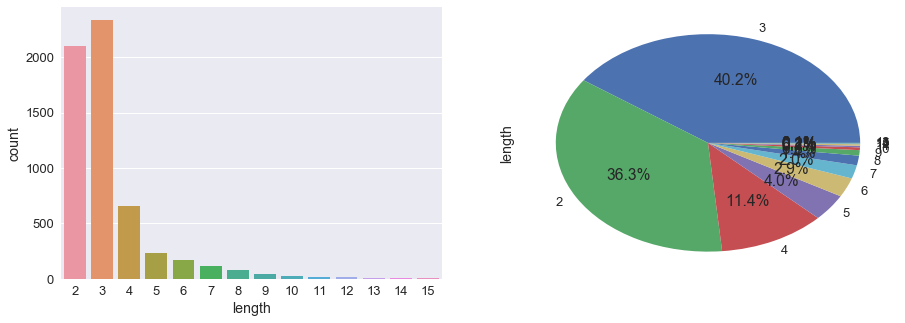

In [17]:
fig, axs = plt.subplots(figsize=(15,5), ncols=2)
sns.countplot(dis["length"], ax=axs[0])
dis["length"].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1])

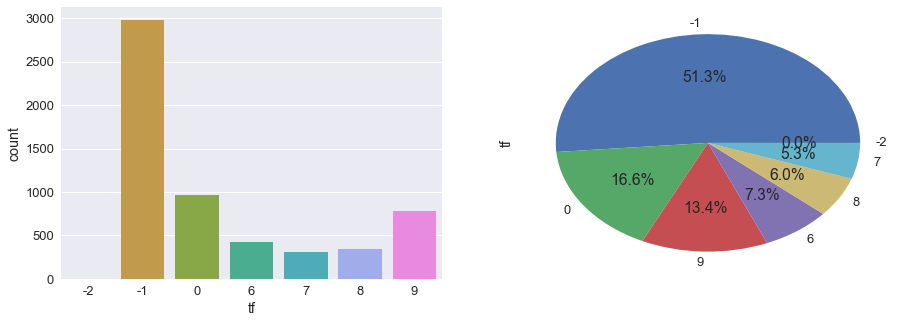

In [18]:
fig, axs = plt.subplots(figsize=(15,5), ncols=2)
sns.countplot(dis["tf"], ax=axs[0])
dis["tf"].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1])

## 新词词性

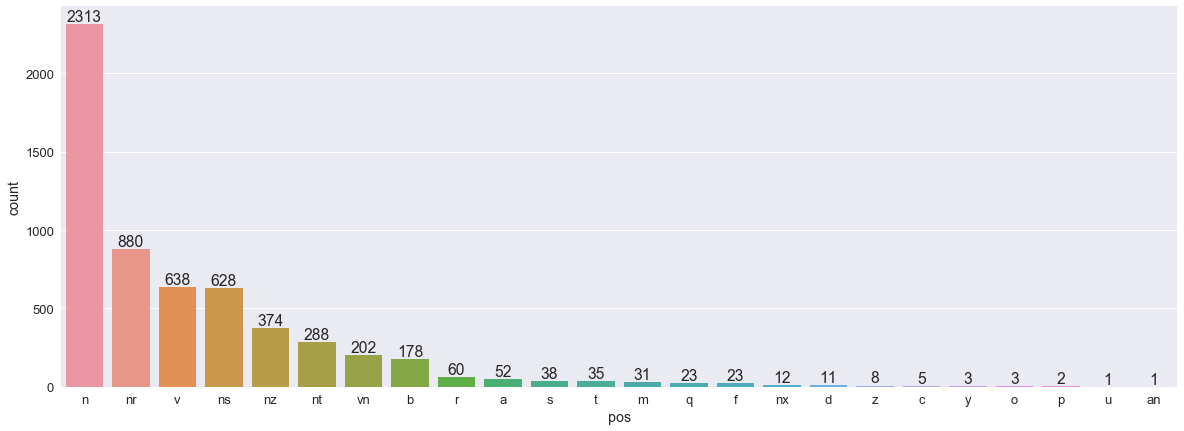

In [16]:
tmp = dis.groupby('pos').filter(lambda x: len(x) > 0)
ax = sns.countplot(tmp["pos"], order=tmp.groupby('pos').size().sort_values(ascending=False).index)
label(ax)

## 新词左右信息熵

In [ ]:
fig, axs = plt.subplots(figsize=(20,5), ncols=2)
sns.countplot(dis["le"], ax=axs[0])
sns.countplot(dis["re"], ax=axs[1])

In [ ]:
countplot(dis["pmi"])

In [ ]:
countplot(dis["tf"])

In [ ]:
sns.jointplot(x="le", y="tf", data=dis)

In [ ]:
sns.jointplot(x="re", y="tf", data=dis)

In [ ]:
sns.jointplot(x="le", y="re", data=dis)

## 新词点互信息

In [ ]:
sns.jointplot(x="tf", y="pmi", data=dis)

In [ ]:
sns.jointplot(x="le", y="re", data=src)

In [ ]:
g = sns.pairplot(dis)

In [ ]:
# src["pos"][src.groupby("pos").count() < 10]
src.groupby('pos').filter(lambda x: len(x) <= 12)

## 登陆词和未登录词

/Users/don/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


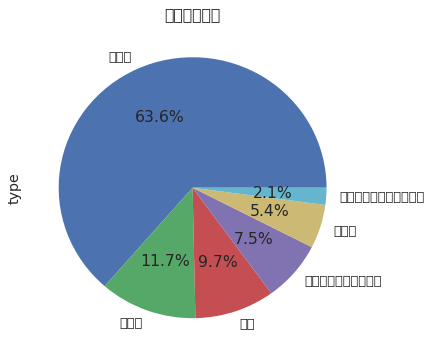

In [6]:
# -*- coding: utf-8 -*- 
from pylab import mpl
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
unknownFile = "unknow.info"
src = pd.read_csv(unknownFile, sep="\\s+", names=["word", "type", "length", "pos", "tf", "pmi", "le", "re"])
src["type"].value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%').set_title("未登录词分布")

/Users/don/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


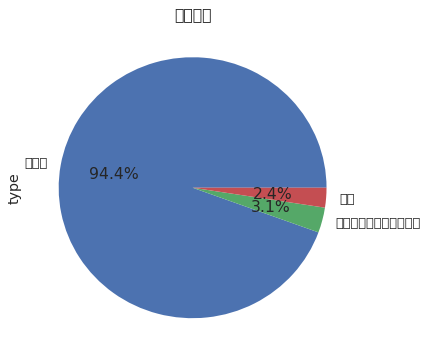

In [7]:
dis["type"].value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%').set_title("新词分布")